In [ ]:
from google.colab import files
uploaded = files.upload()

Saving meets.csv to meets.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./meets.csv', sep=',')

In [ ]:
df.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [ ]:
#размер датасета - количетсво строк и столбцов
df.shape

(8482, 8)

In [ ]:
#поиск пропусков
for col in df.columns:
    is_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(is_missing*100)))

MeetID - 0%
MeetPath - 0%
Federation - 0%
Date - 0%
MeetCountry - 0%
MeetState - 35%
MeetTown - 18%
MeetName - 0%


In [ ]:
df.isnull().sum()

MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

In [ ]:
#узнаем, какого типа данные пропущены 
df.dtypes

MeetID          int64
MeetPath       object
Federation     object
Date           object
MeetCountry    object
MeetState      object
MeetTown       object
MeetName       object
dtype: object

Заполним пропуски в двух столбцах - MeetState и MeetTown

In [ ]:
df['MeetState'].unique()

array(['NC', 'MO', 'SC', 'GA', 'IN', 'CA', 'NV', 'PA', 'FL', nan, 'OR',
       'AK', 'MI', 'AL', 'TX', 'OH', 'AR', 'NJ', 'MS', 'VT', 'UT', 'ME',
       'ND', 'IL', 'NSW', 'SD', 'LA', 'IA', 'ID', 'MN', 'SA', 'QLD',
       'VIC', 'WA', 'MH', 'BC', 'ON', 'QC', 'NS', 'AB', 'SK', 'MB', 'NL',
       'PE', 'NB', 'ACT', 'NY', 'CT', 'MD', 'WV', 'TN', 'CO', 'VA', 'WB',
       'KS', 'OK', 'KY', 'NM', 'AZ', 'WI', 'WKO', 'WGN', 'NTL', 'AKL',
       'OTA', 'CAN', 'BOP', 'STL', 'MWT', 'TAS', 'NT', 'MA', 'RI', 'NH',
       'MT', 'NE', 'DC', 'DE', 'HI', 'WY', 'SP'], dtype=object)

In [ ]:
#заполним пропуски наиболее частым значением
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1 = imp1.fit_transform(df[['MeetState']])

In [ ]:
df1

array([['NC'],
       ['MO'],
       ['NC'],
       ...,
       ['OH'],
       ['OH'],
       ['OH']], dtype=object)

In [ ]:
np.unique(df1)

array(['AB', 'ACT', 'AK', 'AKL', 'AL', 'AR', 'AZ', 'BC', 'BOP', 'CA',
       'CAN', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MB', 'MD', 'ME', 'MH', 'MI', 'MN',
       'MO', 'MS', 'MT', 'MWT', 'NB', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NL',
       'NM', 'NS', 'NSW', 'NT', 'NTL', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR',
       'OTA', 'PA', 'PE', 'QC', 'QLD', 'RI', 'SA', 'SC', 'SD', 'SK', 'SP',
       'STL', 'TAS', 'TN', 'TX', 'UT', 'VA', 'VIC', 'VT', 'WA', 'WB',
       'WGN', 'WI', 'WKO', 'WV', 'WY'], dtype=object)

In [ ]:

print('Было пропущено: {}.'.format(df['MeetState'].isnull().sum()))
print('Сейчас пропущено: {}.'.format(pd.isnull(df1).sum()))

Было пропущено: 2986.
Сейчас пропущено: 0.


In [ ]:
#для столбца MeetTown 
df['MeetTown'].describe()

count           6973
unique          1539
top       Brumunddal
freq             163
Name: MeetTown, dtype: object

Видно, что в колонке очень много уникальных значений, самое популярное составляет чуть больше 2 процентов. Удалим этот столбец


In [ ]:
df.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [ ]:
df.drop(columns=['MeetTown'])

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Eastern USA Challenge
...,...,...,...,...,...,...,...
8477,8477,xpc/2015-finals,XPC,2015-03-06,USA,OH,2015 XPC
8478,8478,xpc/2016-bench-freak-show,XPC,2016-03-04,USA,OH,2016 XPC Bench Freak Show
8479,8479,xpc/2016-elite-finals,XPC,2016-03-04,USA,OH,2016 XPC Elite Finals
8480,8480,xpc/2016-pro-finals,XPC,2016-03-05,USA,OH,2016 XPC PRO Finals


Преобразование категориальных признаков в числовые

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
#кодирование MeetState целочисленными значениями
df_state = pd.DataFrame({'st':df1.T[0]})
df_state

,st
0,NC
1,MO
2,NC
3,SC
4,SC
...,...
8477,OH
8478,OH
8479,OH
8480,OH


In [ ]:
le = LabelEncoder()
le.fit_transform(df_state['st'])


array([37, 32, 37, ..., 50, 50, 50])

In [ ]:
list(le.classes_)

['AB',
 'ACT',
 'AK',
 'AKL',
 'AL',
 'AR',
 'AZ',
 'BC',
 'BOP',
 'CA',
 'CAN',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MB',
 'MD',
 'ME',
 'MH',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'MWT',
 'NB',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NL',
 'NM',
 'NS',
 'NSW',
 'NT',
 'NTL',
 'NV',
 'NY',
 'OH',
 'OK',
 'ON',
 'OR',
 'OTA',
 'PA',
 'PE',
 'QC',
 'QLD',
 'RI',
 'SA',
 'SC',
 'SD',
 'SK',
 'SP',
 'STL',
 'TAS',
 'TN',
 'TX',
 'UT',
 'VA',
 'VIC',
 'VT',
 'WA',
 'WB',
 'WGN',
 'WI',
 'WKO',
 'WV',
 'WY']

In [69]:
#кодирование MeetState бинарными значениями
enc = OneHotEncoder(handle_unknown='ignore')
df_state_enc = enc.fit_transform(df_state[['st']])
df_state_enc.toarray()[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [71]:
df_state.head()

,st
0,NC
1,MO
2,NC
3,SC
4,SC


In [61]:
enc.categories_

[array(['AB', 'ACT', 'AK', 'AKL', 'AL', 'AR', 'AZ', 'BC', 'BOP', 'CA',
        'CAN', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
        'IN', 'KS', 'KY', 'LA', 'MA', 'MB', 'MD', 'ME', 'MH', 'MI', 'MN',
        'MO', 'MS', 'MT', 'MWT', 'NB', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NL',
        'NM', 'NS', 'NSW', 'NT', 'NTL', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR',
        'OTA', 'PA', 'PE', 'QC', 'QLD', 'RI', 'SA', 'SC', 'SD', 'SK', 'SP',
        'STL', 'TAS', 'TN', 'TX', 'UT', 'VA', 'VIC', 'VT', 'WA', 'WB',
        'WGN', 'WI', 'WKO', 'WV', 'WY'], dtype=object)]

In [66]:
df_state_enc

<8482x80 sparse matrix of type '<class 'numpy.float64'>'
	with 8482 stored elements in Compressed Sparse Row format>

In [74]:
#быстрое кодирование MeetState бинарными значениями
pd.get_dummies(df_state).head(20)

,st_AB,st_ACT,st_AK,st_AKL,st_AL,st_AR,st_AZ,st_BC,st_BOP,st_CA,...,st_VA,st_VIC,st_VT,st_WA,st_WB,st_WGN,st_WI,st_WKO,st_WV,st_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#рассмотрим оставшиеся столбцы
df['Federation'].describe()

count     8482
unique      60
top        NSF
freq      2517
Name: Federation, dtype: object

In [77]:
df['MeetPath'].describe()

count               8482
unique              8482
top       365strong/1601
freq                   1
Name: MeetPath, dtype: object

In [78]:
df['Date'].describe()

count           8482
unique          2652
top       2017-02-18
freq              56
Name: Date, dtype: object

In [79]:
df['MeetCountry'].describe()

count     8482
unique      45
top        USA
freq      3894
Name: MeetCountry, dtype: object

In [80]:
df['MeetName'].describe()

count            8482
unique           5217
top       Klubbstevne
freq              584
Name: MeetName, dtype: object

In [94]:
#закодируем целочисленными значениями столбец Federation и бинарными - MeetCountry
df_federation = pd.DataFrame({'f':df['Federation']})
df_federation.head(15)

,f
0,365Strong
1,365Strong
2,365Strong
3,365Strong
4,365Strong
5,365Strong
6,365Strong
7,365Strong
8,365Strong
9,365Strong


In [95]:
le.fit_transform(df_federation['f'])[0:15]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [93]:
df_country = pd.DataFrame({'c':df['MeetCountry']})

In [97]:
df_country_enc = enc.fit_transform(df_country[['c']])
df_country_enc.toarray()[68:72]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [98]:
df_country['c'][68:72]

68          USA
69    Australia
70          USA
71          USA
Name: c, dtype: object

Масштабирование данных

In [99]:
#возьмем новый датасет, содержащий количественные признаки
from google.colab import files
uploaded = files.upload()

Saving openpowerlifting.csv to openpowerlifting.csv


In [100]:
data = pd.read_csv('./openpowerlifting.csv', sep=',')

In [101]:
data.head(10)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [103]:
data.dtypes

MeetID              int64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

In [104]:
#будем работать с колонкой BodyweightKg. Узнаем, есть ли там пропуски
data['BodyweightKg'].isnull().sum()

2402

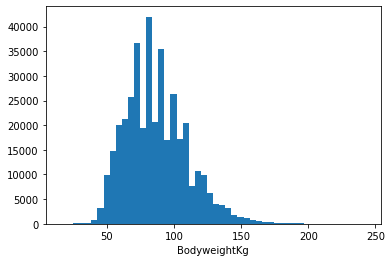

In [106]:
#посмотрим распределение значений
plt.hist(data['BodyweightKg'], 50)
plt.xlabel('BodyweightKg')
plt.show()

In [107]:
data['BodyweightKg'].describe()

count    384012.000000
mean         86.934912
std          23.140843
min          15.880000
25%          70.300000
50%          83.200000
75%         100.000000
max         242.400000
Name: BodyweightKg, dtype: float64

In [110]:
#заполним пропуски
imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
data1 = imp2.fit_transform(data[['BodyweightKg']])
data1

array([[ 59.6 ],
       [ 58.51],
       [ 58.51],
       ...,
       [120.29],
       [126.73],
       [129.46]])

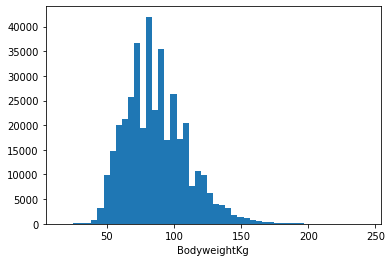

In [112]:
plt.hist(data1, 50)
plt.xlabel('BodyweightKg')
plt.show()

In [115]:
data2 = pd.DataFrame(data1, columns=['BodyweightKg'])
data2.describe()
#описательные статистики практически не изменились

,BodyweightKg
count,386414.000000
mean,86.934912
std,23.068807
min,15.880000
25%,70.400000
50%,83.600000
75%,100.000000
max,242.400000


In [116]:
data2.isnull().sum()
#пропусков не осталось

BodyweightKg    0
dtype: int64

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [117]:
#переходим к маштабированию
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data2[['BodyweightKg']])

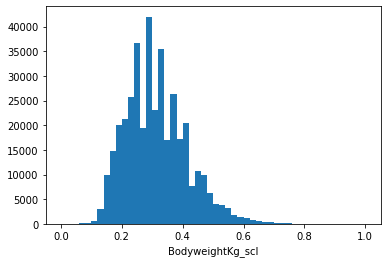

In [118]:
plt.hist(sc1_data, 50)
plt.xlabel('BodyweightKg_scl')
plt.show()

In [119]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data2[['BodyweightKg']])

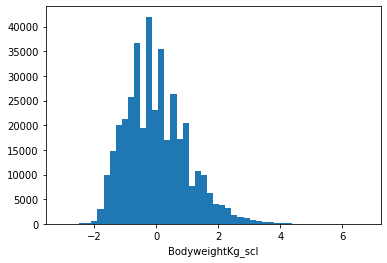

In [120]:
plt.hist(sc2_data, 50)
plt.xlabel('BodyweightKg_scl')
plt.show()